In [38]:
import numpy as np 
import pandas as pd 

In [39]:
df=pd.read_csv(r"C:\Users\cl501_27\Downloads\phiusiil+phishing+url+dataset\PhiUSIIL_Phishing_URL_Dataset.csv")
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [40]:
df.drop(["FILENAME","URL","URLLength","Domain","Title"],axis=1,inplace=True)

In [41]:
label=df['label']

In [42]:
df.head()

,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,24,0,com,100.0,1.000000,0.522907,0.061933,3,1,0,...,0,0,1,34,20,28,119,0,124,1
1,16,0,de,100.0,0.666667,0.032650,0.050207,2,1,0,...,0,0,1,50,9,8,39,0,217,1
2,22,0,uk,100.0,0.866667,0.028555,0.064129,2,2,0,...,0,0,1,10,2,7,42,2,5,1
3,19,0,com,100.0,1.000000,0.522907,0.057606,3,1,0,...,1,1,1,3,27,15,22,1,31,1
4,26,0,org,100.0,1.000000,0.079963,0.059441,3,1,0,...,1,0,1,244,15,34,72,1,85,1


### One-Hot Encoding for TLD Column

In [43]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder(sparse_output=False)

tld = pd.DataFrame(df["TLD"])

TLD_encoded = one.fit_transform(tld)
# Convert the result to a DataFrame with appropriate column names
TLD_encoded_df = pd.DataFrame(TLD_encoded, columns=one.get_feature_names_out(['TLD']))

print(TLD_encoded_df)

        TLD_100  TLD_101  TLD_103  TLD_106  TLD_107  TLD_108  TLD_11  TLD_110  \
0           0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
1           0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
2           0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
3           0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
4           0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
...         ...      ...      ...      ...      ...      ...     ...      ...   
235790      0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
235791      0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
235792      0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
235793      0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
235794      0.0      0.0      0.0      0.0      0.0      0.0     0.0      0.0   

        TLD_111  TLD_116  .

In [44]:
"""final_df = pd.merge(df,TLD_encoded_df,left_index=True, right_index=True)
final_df.head()"""

'final_df = pd.merge(df,TLD_encoded_df,left_index=True, right_index=True)\nfinal_df.head()'

### Removing Label from the DataSet

In [45]:
df.drop(["label","TLD"],axis=1,inplace=True)
X =df.copy()

In [46]:
print(X)

        DomainLength  IsDomainIP  URLSimilarityIndex  CharContinuationRate  \
0                 24           0          100.000000              1.000000   
1                 16           0          100.000000              0.666667   
2                 22           0          100.000000              0.866667   
3                 19           0          100.000000              1.000000   
4                 26           0          100.000000              1.000000   
...              ...         ...                 ...                   ...   
235790            22           0          100.000000              1.000000   
235791            21           0          100.000000              0.785714   
235792            23           0          100.000000              1.000000   
235793            47           0           28.157537              0.465116   
235794            26           0          100.000000              1.000000   

        TLDLegitimateProb  URLCharProb  TLDLength  NoOfSubDomai

### Feature Selection 

1. Scaling 

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
scaled_df

,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,0.276436,-0.052087,0.744382,0.713153,1.043145,0.584293,0.392745,-0.274154,-0.045399,-0.01325,...,2.620780,-0.557340,-0.155042,1.02681,0.099788,0.182551,0.783327,0.305222,-0.134778,0.464130
1,-0.597807,-0.052087,0.744382,-0.825555,-0.905197,-0.523283,-1.274652,-0.274154,-0.045399,-0.01325,...,-0.381566,-0.557340,-0.155042,1.02681,0.301270,0.035622,-0.113046,-0.147555,-0.134778,1.041672
2,0.057875,-0.052087,0.744382,0.097670,-0.921472,0.791672,-1.274652,1.389828,-0.045399,-0.01325,...,-0.381566,-0.557340,-0.155042,1.02681,-0.202435,-0.057878,-0.157865,-0.130576,-0.021406,-0.274876
3,-0.269966,-0.052087,0.744382,0.713153,1.043145,0.175546,0.392745,-0.274154,-0.045399,-0.01325,...,-0.381566,1.794238,6.449862,1.02681,-0.290583,0.276051,0.200684,-0.243770,-0.078092,-0.113413
4,0.494997,-0.052087,0.744382,0.713153,-0.717171,0.348931,0.392745,-0.274154,-0.045399,-0.01325,...,2.620780,1.794238,-0.155042,1.02681,2.744236,0.115765,1.052238,0.039216,-0.078092,0.221935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,0.057875,-0.052087,0.744382,0.713153,1.043145,0.282549,0.392745,-0.274154,-0.045399,-0.01325,...,-0.381566,1.794238,-0.155042,1.02681,0.313862,0.008908,0.469596,0.690083,-0.021406,0.880209
235791,-0.051405,-0.052087,0.744382,-0.276016,-0.921472,-0.180723,-1.274652,1.389828,-0.045399,-0.01325,...,-0.381566,1.794238,-0.155042,-0.97389,0.301270,-0.071235,-0.157865,0.129771,-0.134778,-0.113413
235792,0.167156,-0.052087,0.744382,0.713153,-1.021764,0.693888,-1.274652,-0.274154,-0.045399,-0.01325,...,-0.381566,-0.557340,-0.155042,1.02681,0.011639,0.048979,0.872964,-0.040021,-0.021406,0.110152
235793,2.789885,-0.052087,-1.734996,-1.755936,-1.031133,-0.522953,0.392745,1.389828,-0.045399,-0.01325,...,-0.381566,-0.557340,-0.155042,-0.97389,-0.328361,-0.084592,-0.337140,-0.368284,-0.134778,-0.305927


2. Using PCA 

In [48]:
c=scaled_df.cov() # Covariance of scaled data
eigenvalues, eigenvectors=np.linalg.eig(c)
print("Eigen values:\n",eigenvalues)
print("Eigen values shape:", eigenvalues.shape)
print("Eigen vectors shape:", eigenvectors.shape)

Eigen values:
 [8.94742919 4.47678316 2.71829157 1.99733675 1.86083981 1.80046742
 1.58909946 1.48257112 1.3787637  1.22884431 1.14129301 1.1151787
 0.03095253 0.05792826 0.05847996 0.09154381 0.1055733  1.06541938
 0.14539746 1.00700379 0.99399721 0.97232811 0.94924593 0.20730971
 0.21757464 0.24952754 0.86707425 0.84987186 0.81458755 0.28051584
 0.29950903 0.33073305 0.39220383 0.38836704 0.42115828 0.43670186
 0.4516713  0.45817447 0.77361781 0.74247072 0.727782   0.5378314
 0.6807621  0.66325407 0.64303139 0.55821381 0.57856973 0.61630748
 0.59861914]
Eigen values shape: (49,)
Eigen vectors shape: (49, 49)


In [49]:
# Index Eigen values in descending order
idx=eigenvalues.argsort()[::-1]

#sort the eigen values in descending order
eigenvalues=eigenvalues[idx]

#sort the corresponding vectors accordingly
eigenvectors=eigenvectors[:,idx]

In [50]:
explained_var=np.cumsum(eigenvalues)/np.sum(eigenvalues)
explained_var=pd.Series(explained_var)

In [51]:
n_components=explained_var[explained_var>0.5].count()

In [52]:

n_components

42

In [53]:
from sklearn.decomposition import PCA


In [54]:
pca=PCA(n_components=n_components)
pca

PCA(n_components=42)

In [55]:
pca_df=pca.fit_transform(scaled_df)
pca_df=pd.DataFrame(pca_df,columns=['PC{}'.format(i+1)
                                    for i in range(n_components)])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42
0,-1.378662,0.324723,-0.678316,-1.096767,-0.104987,0.955367,0.477642,-0.286234,-0.230561,-0.056438,...,0.480399,-0.099283,0.549424,0.709826,0.426515,0.920022,0.220622,0.118701,-0.107135,-0.247513
1,-0.841598,-0.000786,-0.707815,2.219164,-0.580844,-0.425952,0.599699,0.023524,0.820418,0.110980,...,0.749960,0.341581,-0.253211,0.095166,0.000714,-0.647273,0.108049,-0.568100,0.250677,-0.784381
2,-1.122874,0.260022,-1.032923,1.366636,-1.704659,0.615378,0.361867,0.915835,0.222459,-0.293066,...,-0.306007,0.082364,-0.187737,0.599123,0.611107,1.313692,0.048619,0.126419,-0.265820,0.459786
3,-2.455080,0.753804,-1.074699,-0.878290,0.567482,0.582563,0.252952,-0.660451,-0.894300,-0.058994,...,0.755560,0.150444,0.294900,0.049874,0.055152,-0.508791,0.170911,0.065037,-0.037749,-0.291659
4,-3.800763,1.333693,-1.049554,-1.321663,2.852828,-0.921952,-2.401585,3.465858,0.842325,0.506730,...,-0.632440,0.113311,-1.231925,-0.875267,0.130761,0.246138,-0.093915,-0.362125,-0.128031,0.263069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,-3.782410,1.020506,-0.077056,-0.782099,-0.727545,0.361507,0.455551,-0.309839,0.886216,0.510433,...,-0.286415,0.076835,-0.398973,0.147265,0.359416,-0.295259,0.222165,-0.086017,-0.131831,0.029187
235791,-0.964874,0.516785,-2.221999,1.675765,-1.011234,0.448770,0.078040,0.551362,-0.935288,-0.433384,...,-0.483517,0.070851,-0.408393,0.145751,-1.261044,-0.241099,0.491604,-0.053508,-0.094520,-0.047255
235792,-2.758728,0.386707,0.193512,0.892685,-1.666808,0.173100,0.432919,0.618102,0.911869,-0.183599,...,0.220371,-0.434333,-1.013131,0.224720,-0.021629,-0.009247,-0.446815,-0.103278,-0.020310,0.271679
235793,2.884210,0.812572,-3.238192,-1.734662,-0.875155,1.559405,-0.876397,0.387576,-0.476262,0.619637,...,-0.167480,-0.202618,-0.159048,-0.622390,-0.418853,0.484254,0.144505,-0.100548,-0.107840,0.180638


#### 3. Using t-SNE

In [56]:
from sklearn.manifold import TSNE


In [57]:
tsne=TSNE(n_components=2, random_state=0)
tsne_data=tsne.fit_transform(scaled_df)
tsne_data


array([[ -25.682354,   35.797123],
       [ -99.848465,  -30.226278],
       [   9.790107,   60.065655],
       ...,
       [ -95.72249 ,  -28.049862],
       [  54.224106,   61.49232 ],
       [-118.315636,  -51.73355 ]], dtype=float32)

In [58]:
import matplotlib.pyplot as plt

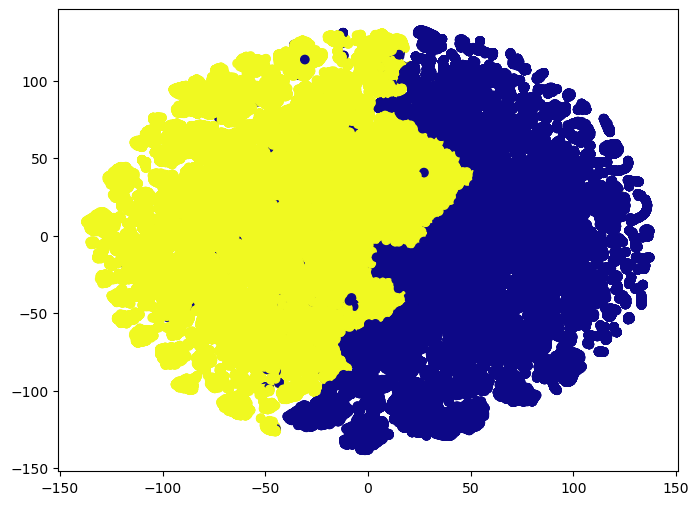

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(tsne_data[:,0],tsne_data[:,1],c=label,cmap='plasma')
plt.show()